# Clustering using Predicted Class Probabilities

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import sklearn

In [3]:
# Some name constants
FEATS_FOLDER_NAME = 'features'
PROBS_FILE_NAME = 'incv1_probs.csv'
FEATS_FILE_NAME = 'incv1_feats.csv'
HIST_FILE_NAME = 'color_hist.csv'

In [4]:
# Some path constants
ROOT_DIR = os.path.join('.', '..')
FEATS_FOLDER_PATH = os.path.join(ROOT_DIR, FEATS_FOLDER_NAME)
PROBS_FILE_PATH = os.path.join(FEATS_FOLDER_PATH, PROBS_FILE_NAME)
FEATS_FILE_PATH = os.path.join(FEATS_FOLDER_PATH, FEATS_FILE_NAME)
HIST_FILE_PATH = os.path.join(FEATS_FOLDER_PATH, HIST_FILE_NAME)

## Loading Data

In [5]:
data = pd.read_csv(PROBS_FILE_PATH)

In [6]:
data.dtypes

Unnamed: 0            object
background           float64
tench                float64
goldfish             float64
great white shark    float64
                      ...   
earthstar            float64
hen-of-the-woods     float64
bolete               float64
ear                  float64
toilet tissue        float64
Length: 1002, dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Columns: 1002 entries, Unnamed: 0 to toilet tissue
dtypes: float64(1001), object(1)
memory usage: 1.5+ MB


We have 1001 float64 dimensions, which are the ones that represent the estimated class probabilities of the images. We also have an objetc column, which tells us the original name of the image used.

In [8]:
data.describe()

,background,tench,goldfish,great white shark,tiger shark,hammerhead,electric ray,stingray,cock,hen,...,buckeye,coral fungus,agaric,gyromitra,stinkhorn,earthstar,hen-of-the-woods,bolete,ear,toilet tissue
count,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,...,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02
mean,8.531268e-06,1.169940e-05,9.281839e-06,1.079094e-05,1.260431e-05,6.087713e-06,6.292971e-06,3.641339e-06,1.786824e-05,1.677663e-05,...,1.172156e-05,5.976620e-06,1.957596e-05,4.527671e-06,4.548889e-06,9.676029e-06,9.109094e-06,6.501363e-06,7.047873e-06,2.120684e-05
std,1.383907e-05,2.596422e-05,1.740853e-05,1.855888e-05,2.231282e-05,1.255732e-05,2.021846e-05,7.495154e-06,6.673565e-05,3.086071e-05,...,2.267067e-05,1.116392e-05,5.165005e-05,9.459849e-06,1.083681e-05,1.591376e-05,2.102194e-05,3.218857e-05,1.581809e-05,1.216542e-04
min,3.535789e-11,7.684270e-12,6.872384e-13,3.938997e-12,1.296073e-11,3.028916e-11,1.360807e-11,5.197018e-12,3.595068e-11,1.212723e-11,...,1.634339e-11,3.851920e-11,3.951005e-13,3.552775e-12,3.178692e-12,5.751082e-12,2.264364e-11,1.622970e-11,7.631085e-11,7.772611e-12
25%,2.558923e-07,1.270213e-07,1.299974e-07,1.483429e-07,1.665061e-07,1.400996e-07,1.497993e-07,1.394070e-07,1.943333e-07,2.229228e-07,...,3.074354e-07,1.271136e-07,1.784106e-07,1.322664e-07,8.701061e-08,1.752269e-07,1.799291e-07,1.363106e-07,2.112173e-07,2.765628e-07
50%,2.293754e-06,1.792880e-06,1.233935e-06,2.502970e-06,2.359635e-06,1.636690e-06,1.455737e-06,9.105386e-07,2.752347e-06,3.257867e-06,...,2.823424e-06,1.661238e-06,2.638675e-06,1.110241e-06,1.049315e-06,2.045040e-06,1.813588e-06,9.076630e-07,1.713353e-06,4.471679e-06
75%,1.078790e-05,1.394542e-05,1.088192e-05,1.353980e-05,1.608866e-05,6.651816e-06,5.012110e-06,4.090950e-06,1.414004e-05,1.731359e-05,...,1.120545e-05,5.989195e-06,1.874980e-05,3.736021e-06,3.649862e-06,1.261604e-05,9.328429e-06,3.702821e-06,6.621315e-06,1.422059e-05
max,9.423414e-05,2.673816e-04,1.153122e-04,1.215380e-04,1.492972e-04,1.290557e-04,2.243187e-04,6.242465e-05,8.253073e-04,1.960261e-04,...,1.813113e-04,7.253750e-05,5.983281e-04,9.139953e-05,1.119854e-04,1.034914e-04,2.298098e-04,4.204671e-04,1.314363e-04,1.662568e-03


Although the last table does not show it, we know the range of posible values or our attributes is [0.0,1.0] because we are dealing with probabilities.

## Preprocessing the Data

In [9]:
X = data.values[:,1:].copy()

In [10]:
X.shape

(198, 1001)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.shape

(198, 1001)

## KMeans Clustering

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
def fit_kmeans(data, no_clusters):
    inertias = []
    scores = []
    for k in no_clusters:
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        km.fit(data)
        inertias.append(km.inertia_)
        score = silhouette_score(data, km.labels_)
        scores.append(score)
    return inertias, scores

In [15]:
def plot_metrics(data, titles, xrange, xstep, figsize):
    ylabels = ['Inertias', 'Sil. Scores']
    fig, ax = plt.subplots(nrows=1, ncols=len(data), figsize=figsize)
    for i in range(len(data)):
        ax[i].plot(range(xrange[0], xrange[1]+xstep, xstep), data[i], '.b-')
        ax[i].xaxis.set_major_locator(plt.MultipleLocator(xstep))
        ax[i].set_xlabel('Number of clusters')
        ax[i].set_ylabel(ylabels[i])
        ax[i].set_title(titles[i])
    plt.tight_layout()
    plt.show()
    return fig

### Scaled Data

In [16]:
std_inertias, std_scores = fit_kmeans(X_scaled, range(2, 42, 2))

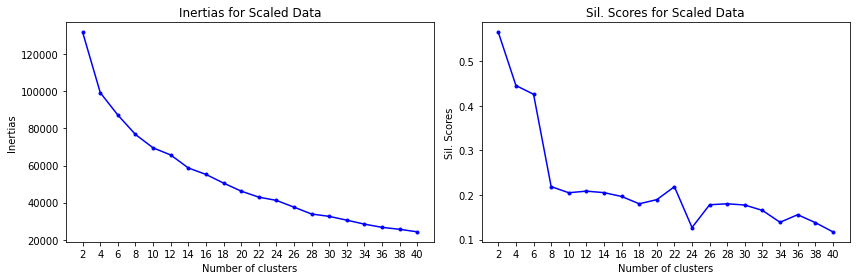

In [17]:
fig = plot_metrics((std_inertias, std_scores),
            ('Inertias for Scaled Data', 'Sil. Scores for Scaled Data'),
            (2, 40), 2, (12, 4))

### Unscaled Data

In [18]:
inertias, scores = fit_kmeans(X, range(2, 42, 2))

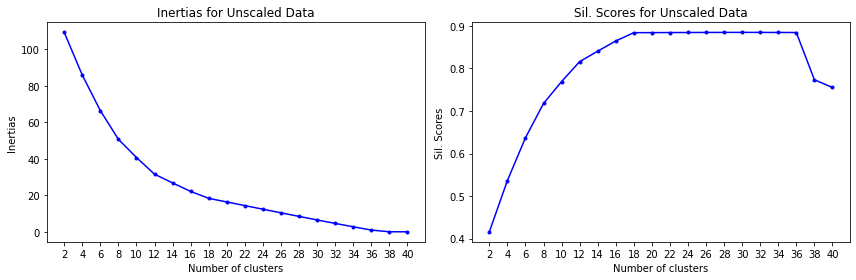

In [19]:
fig = plot_metrics((inertias, scores),
            ('Inertias for Unscaled Data', 'Sil. Scores for Unscaled Data'),
            (2, 40), 2, (12, 4))

There's a plateau between k=18  and k=36 , with a inertia around 0.884. Between these values, k=30 represents the best values of k, with a score of 0.88469. As a curious fact, we used 37 classes in our study.

## DBSCAN Clustering

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [24]:
8 >np.inf

False

In [27]:
lol = np.array([-1, -1, -1, -1, -1])
lol

array([-1, -1, -1, -1, -1])

In [29]:
mask = lol != -1
mask

array([False, False, False, False, False])

In [31]:
n_clust = lol[mask]
n_clust

array([], dtype=int32)

In [32]:
len(n_clust)

0

In [36]:
def fit_dbscan(data, min_samples, eps_values, min_no_clusters=2, max_no_clusters=np.inf, min_clust_instances=20, max_clust_instances=np.inf):
    scores = []
    clusters = []
    instances = []
    
    for m in min_samples:
        row_scores = []
        row_clusters = []
        row_instances = []
        for e in eps_values:
            db = DBSCAN(min_samples=m, eps=e)
            db.fit(data)
            # Get only non anomalous instances
            non_a = db.labels_ != -1 # [False, ..., False] if all are outliers
            # TODO: If at least one is True, keep going
            # Calculate conditions
            n_clusters = len(np.unique(db.labels_[non_a])) # 0 if all are outliers
            n_instances = len(db.labels_[non_a]) # 0 if all are outliers
            # Apply conditions
            if (n_clusters >= min_no_clusters and n_clusters <= max_no_clusters and n_instances >= min_clust_instances and n_instances <= max_clust_instances):
                score = silhouette_score(data[non_a], db.labels_[non_a])
            else:
                score = None
            # Store results
            row_scores.append(score)
            row_clusters.append(n_clusters)
            row_instances.append(n_instances)
        # Store row results
        scores.append(row_scores)
        clusters.append(row_clusters)
        instances.append(row_instances)
    # Prepare and return values
    ms_axis = pd.Index(min_samples, name='Min_samples')
    eps_axis = pd.Index(eps_values, name='Epsilon')
    df_scores = pd.DataFrame(scores, index=ms_axis, columns=eps_axis)
    df_clusters = pd.DataFrame(clusters, index=ms_axis, columns=eps_axis)
    df_instances = pd.DataFrame(instances, index=ms_axis, columns=eps_axis)
    return df_scores, df_clusters, df_instances

In [40]:
dfs, dfc, dfi = fit_dbscan(X, range(2, 22, 2), np.arange(0.1, 2.0, 0.2), 2, 25, 20, np.inf)
dfs

Epsilon,0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9
Min_samples,,,,,,,,,,
2,0.985478,0.984136,0.984136,0.984136,0.984136,0.984136,None,None,None,None
4,0.984552,0.983074,0.983074,0.983074,0.983074,0.983074,None,None,None,None
6,0.983870,0.982298,0.982298,0.982298,0.982298,0.982298,None,None,None,None
8,0.982746,0.981035,0.981035,0.981035,0.981035,0.981035,None,None,None,None
10,0.980964,0.979027,0.979027,0.979027,0.979027,0.979027,None,None,None,None
12,0.982367,0.980157,0.980157,0.980157,0.980157,0.980157,None,None,None,None
14,0.980754,0.978259,0.978259,0.978259,0.978259,0.978259,None,None,None,None
16,0.980754,0.978259,0.978259,0.978259,0.978259,0.978259,None,None,None,None
18,0.980754,0.978259,0.978259,0.978259,0.978259,0.978259,None,None,None,None


There's a lot of good parameters for DBSCAN clustering, because many of the scores are near 100%. Let's check the number of clustered instances.

In [52]:
# applymap allows to apply a function to the values inside each cell. In this case, we use to filter values.
dfi.applymap(lambda x: x if (x >= 150) else 0)

Epsilon,0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9
Min_samples,,,,,,,,,,
2,177,178,178,178,178,178,198,198,198,198
4,160,161,161,161,161,161,198,198,198,198
6,150,151,151,151,151,151,198,198,198,198
8,0,0,0,0,0,0,198,198,198,198
10,0,0,0,0,0,0,198,198,198,198
12,0,0,0,0,0,0,198,198,198,198
14,0,0,0,0,0,0,198,198,198,198
16,0,0,0,0,0,0,198,198,198,198
18,0,0,0,0,0,0,198,198,198,198


We decided to show only the DBSCAN results where at leasts 75% of the instances were assigned to a cluster. Although we have a lot of models trained that contained all the instances (198 to be precise), we will ignore those because they did not have a score in the scores table (i.e. they don't meet the criteria for the DBSCAN clustering). There's still a broad spectrum of good parameters for DBSCAN clustering, with a min_samples ranging from 2 to 6, and a epsilon distance going from 0.1 to 1.1. Now we'll check the no. of generated clusters so we can tighten up that spectrum.

In [42]:
dfc

Epsilon,0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9
Min_samples,,,,,,,,,,
2,17,17,17,17,17,17,1,1,1,1
4,10,10,10,10,10,10,1,1,1,1
6,8,8,8,8,8,8,1,1,1,1
8,6,6,6,6,6,6,1,1,1,1
10,4,4,4,4,4,4,1,1,1,1
12,3,3,3,3,3,3,1,1,1,1
14,2,2,2,2,2,2,1,1,1,1
16,2,2,2,2,2,2,1,1,1,1
18,2,2,2,2,2,2,1,1,1,1


Just by looking at the generated clusters, any the DBSCAN parameters seem OK. In this project we prefer few clusters with many instances rather than many clusters with few instances. We can calculate calculate the average of instances grouped into a cluster so we can see wich parameters favor the creation of clusters with many instances.

In [54]:
dfi/dfc

Epsilon,0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9
Min_samples,,,,,,,,,,
2,10.411765,10.470588,10.470588,10.470588,10.470588,10.470588,198.0,198.0,198.0,198.0
4,16.000000,16.100000,16.100000,16.100000,16.100000,16.100000,198.0,198.0,198.0,198.0
6,18.750000,18.875000,18.875000,18.875000,18.875000,18.875000,198.0,198.0,198.0,198.0
8,22.833333,23.000000,23.000000,23.000000,23.000000,23.000000,198.0,198.0,198.0,198.0
10,30.000000,30.250000,30.250000,30.250000,30.250000,30.250000,198.0,198.0,198.0,198.0
12,36.333333,36.666667,36.666667,36.666667,36.666667,36.666667,198.0,198.0,198.0,198.0
14,48.000000,48.500000,48.500000,48.500000,48.500000,48.500000,198.0,198.0,198.0,198.0
16,48.000000,48.500000,48.500000,48.500000,48.500000,48.500000,198.0,198.0,198.0,198.0
18,48.000000,48.500000,48.500000,48.500000,48.500000,48.500000,198.0,198.0,198.0,198.0


From the broad spectrum of parameters considered before (min_samples between [2-6] and epsilon between [0.1-1.1]), the clusters detected when using min_samples=6 and episilon=0.3  offers the highest average number of instances per cluster.